In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [8]:
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [9]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [10]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

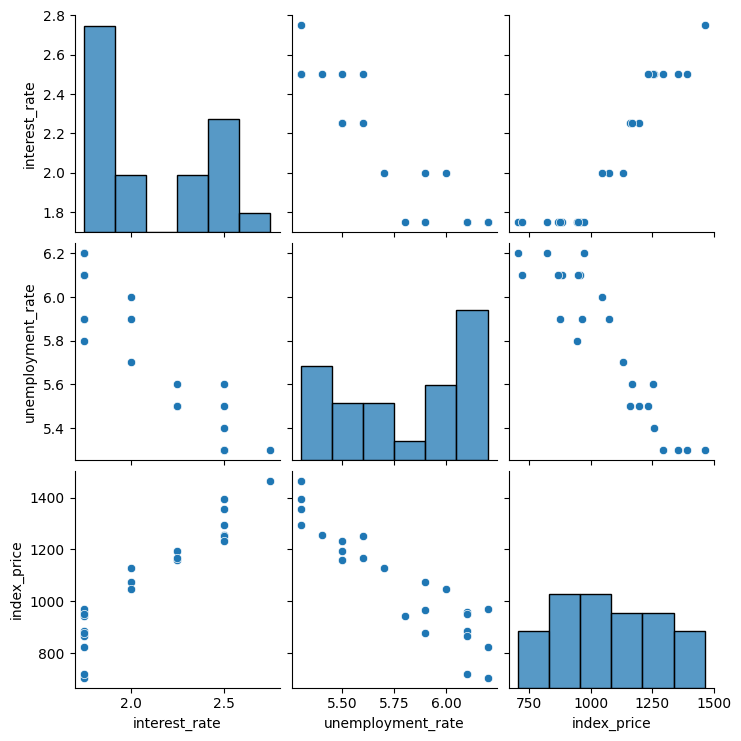

In [11]:
## visualization
sns.pairplot(df)

In [12]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


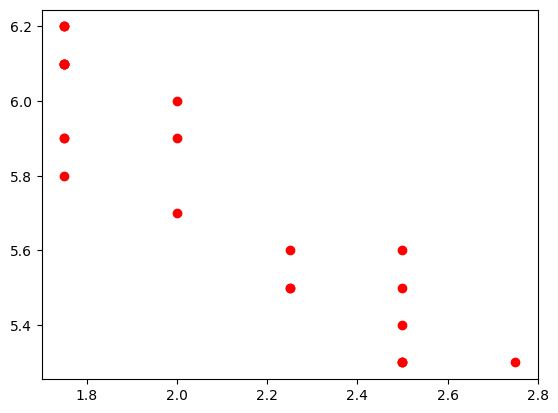

In [13]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='red')

In [14]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [16]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
sns.regplot(df['interest_rate'],df['index_price'])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [21]:
from sklearn.preprocessing import StandardScaler


In [22]:
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)

In [25]:
X_test=scaler.fit_transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regression=LinearRegression()

In [28]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [31]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [32]:
#prediction
y_pred=regression.predict(X_test)

In [33]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [35]:
from sklearn.metrics import r2_score

In [36]:
# Assumptions
score=r2_score(y_test,y_pred)

In [37]:
score

0.7591371539010257

In [39]:
residuals=y_test-y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

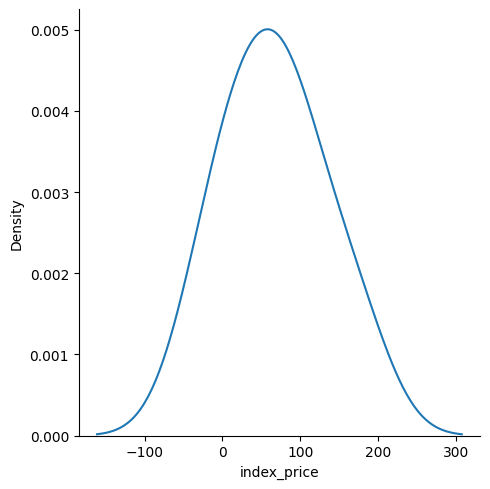

In [44]:
sns.displot(residuals,kind='kde')

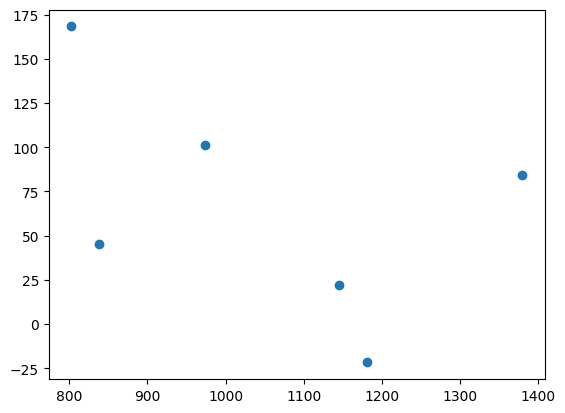

In [47]:
plt.scatter(y_pred,residuals)